In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import io

In [4]:
qpcr_results = pd.read_excel("./20200328 LOD.xlsx", sheet_name="Results", skiprows=42, na_values=['Undetermined'])

# Standard Curve

In [17]:
sc = qpcr_results[qpcr_results['Sample Name'].str.contains('PCD')]

In [14]:
sc[['Sample Name', 'CT', 'Quantity', 'Amp Status']]

,Sample Name,CT,Quantity,Amp Status
0,PCD 1,18.190771,1000000.0,Amp
1,PCD 1,18.221386,1000000.0,Inconclusive
2,PCD 1,30.218191,1000000.0,No Amp
3,PCD 2,21.834450,100000.0,Amp
4,PCD 2,21.711990,100000.0,Amp
5,PCD 2,21.561811,100000.0,Amp
6,PCD 3,25.673681,10000.0,Amp
7,PCD 3,25.101904,10000.0,Amp
8,PCD 3,24.972567,10000.0,Amp
9,PCD 4,29.289790,1000.0,Amp


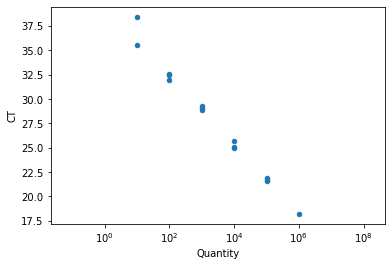

In [20]:
sc[sc['Amp Status'] == 'Amp'].plot.scatter(x='Quantity', y='CT', logx=True)

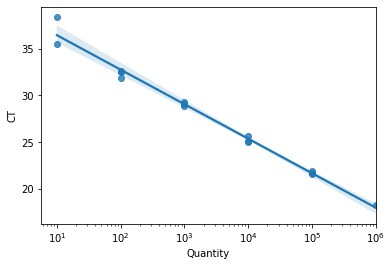

In [18]:
ax = sns.regplot(data=sc[sc['Amp Status'] == 'Amp'], x='Quantity', y='CT', logx=True)
ax.set_xscale('log')

In [130]:
sc[['Sample Name', 'Quantity', 'Amp Status']]

,Sample Name,Quantity,Amp Status
15,PCD 1,1000000.0,Amp
16,PCD 1,1000000.0,Inconclusive
17,PCD 1,1000000.0,No Amp
33,PCD 2,100000.0,Amp
34,PCD 2,100000.0,Amp
35,PCD 2,100000.0,Amp
51,PCD 3,10000.0,Amp
52,PCD 3,10000.0,Amp
53,PCD 3,10000.0,Amp
69,PCD 4,1000.0,Amp


# Negative Controls

In [67]:
negs = qpcr_results.loc[qpcr_results['Sample Name'].str.contains('Negative')]
negs

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,Ct Threshold,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,CQCONF,EXPFAIL,HIGHSD,OUTLIERRG
117,79,G7,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,39.116722,...,19635.94988,True,3,18,No Amp,NaN,N,N,N,N
118,79,G7,False,Negative,VIC,NTC,VIC,NFQ-MGB,NaN,NaN,...,1942.52091,True,3,49,No Amp,NaN,N,N,N,N
119,80,G8,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,39.116722,...,19635.94988,True,3,3,Inconclusive,NaN,N,N,N,N
120,80,G8,False,Negative,VIC,NTC,VIC,NFQ-MGB,NaN,NaN,...,1942.52091,True,3,4,No Amp,NaN,N,N,N,N
121,81,G9,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,39.116722,...,19635.94988,True,3,3,Inconclusive,NaN,N,N,N,N
122,81,G9,False,Negative,VIC,NTC,VIC,NFQ-MGB,NaN,NaN,...,1942.52091,True,3,49,No Amp,NaN,N,N,N,N
138,91,H7,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,39.116722,...,19635.94988,True,3,5,No Amp,NaN,N,N,N,N
139,91,H7,False,Negative,VIC,NTC,VIC,NFQ-MGB,NaN,NaN,...,1942.52091,True,3,30,No Amp,NaN,N,N,N,N
140,92,H8,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,39.116722,...,19635.94988,True,3,12,No Amp,NaN,N,N,N,N
141,92,H8,False,Negative,VIC,NTC,VIC,NFQ-MGB,NaN,NaN,...,1942.52091,True,3,31,No Amp,NaN,N,N,N,N


In [74]:
negs['Amp Status'].str.match('Amp').any()

True

# Endogenous Controls

In [53]:
endo = qpcr_results.loc[(qpcr_results['Reporter'] == 'FAM') & qpcr_results['Sample Name'].str.contains('Endogenous')]
endo[['Sample Name', 'Amp Status']]

,Sample Name,Amp Status
12,1 Endogenous,Amp
13,6 Endogenous,Amp
14,44 Endogenous,Amp
30,2 Endogenous,Amp
31,7 Endogenous,Amp
32,45 Endogenous,Amp
48,3 Endogenous,Amp
49,8 Endogenous,Amp
50,46 Endogenous,Amp
66,4 Endogenous,Amp


In [54]:
endo

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,Ct Threshold,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,CQCONF,EXPFAIL,HIGHSD,OUTLIERRG
12,7,A7,False,1 Endogenous,FAM,UNKNOWN,FAM,NFQ-MGB,24.156548,24.156548,...,19635.94988,True,3,13,Amp,NaN,N,N,N,N
13,8,A8,False,6 Endogenous,FAM,UNKNOWN,FAM,NFQ-MGB,24.514900,24.514900,...,19635.94988,True,3,15,Amp,NaN,N,N,N,N
14,9,A9,False,44 Endogenous,FAM,UNKNOWN,FAM,NFQ-MGB,27.547148,27.547148,...,19635.94988,True,3,15,Amp,NaN,N,N,N,N
30,19,B7,False,2 Endogenous,FAM,UNKNOWN,FAM,NFQ-MGB,29.608110,29.608110,...,19635.94988,True,3,23,Amp,NaN,N,N,N,N
31,20,B8,False,7 Endogenous,FAM,UNKNOWN,FAM,NFQ-MGB,28.001907,28.001907,...,19635.94988,True,3,20,Amp,NaN,N,N,N,N
32,21,B9,False,45 Endogenous,FAM,UNKNOWN,FAM,NFQ-MGB,30.995901,30.995901,...,19635.94988,True,3,25,Amp,NaN,N,N,N,N
48,31,C7,False,3 Endogenous,FAM,UNKNOWN,FAM,NFQ-MGB,27.303790,27.303789,...,19635.94988,True,3,20,Amp,NaN,N,N,N,N
49,32,C8,False,8 Endogenous,FAM,UNKNOWN,FAM,NFQ-MGB,26.320099,26.320099,...,19635.94988,True,3,17,Amp,NaN,N,N,N,N
50,33,C9,False,46 Endogenous,FAM,UNKNOWN,FAM,NFQ-MGB,30.399136,30.399136,...,19635.94988,True,3,22,Amp,NaN,N,N,N,N
66,43,D7,False,4 Endogenous,FAM,UNKNOWN,FAM,NFQ-MGB,27.852406,27.852406,...,19635.94988,True,3,20,Amp,NaN,N,N,N,N


In [56]:
endo.loc[:, 'Sample Number'] = endo['Sample Name'].str.replace(r'[\D]*([0-9]+)[\D]*', r'\1').astype(np.int)

/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


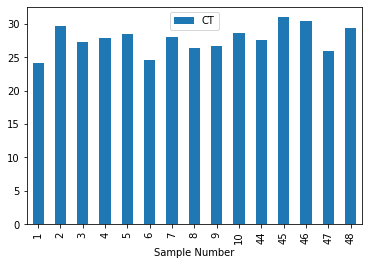

In [198]:
endo.sort_values(by=['Sample Number']).plot.bar(x='Sample Number', y='CT')

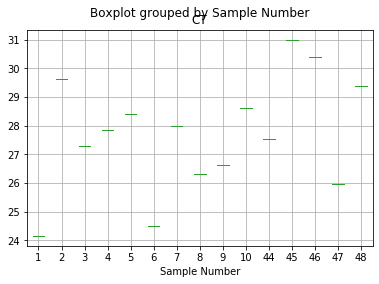

In [63]:
endo.boxplot(by='Sample Number', column=['CT'])

# CoV

In [242]:
ncov = qpcr_results[(qpcr_results['Reporter'] == 'FAM') & qpcr_results['Sample Name'].str.contains('nCoV')]

In [243]:
ncov.loc[:, 'Sample Number'] = ncov['Sample Name'].str.replace(r'[\D]*([0-9]+)[\D]*', r'\1').astype(np.int)

/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


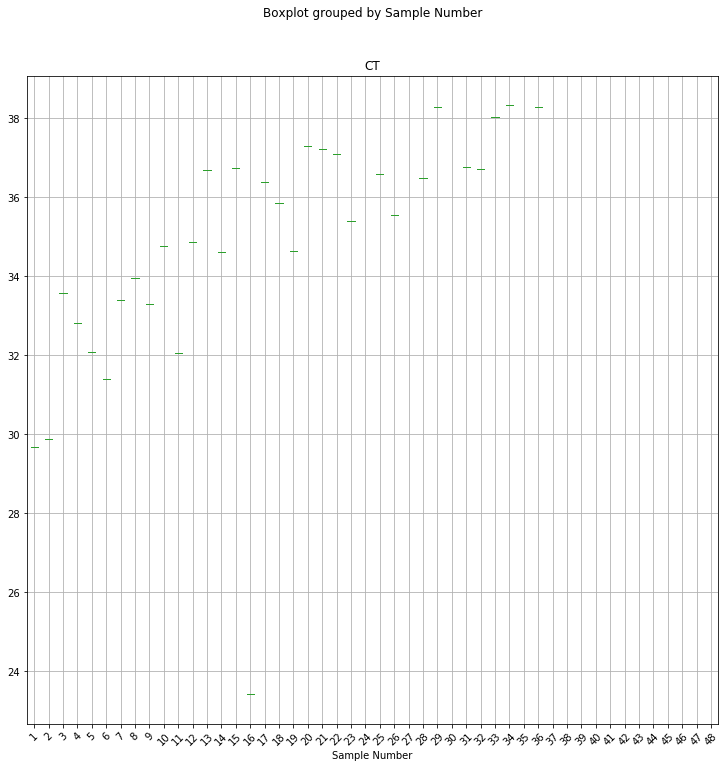

In [244]:
ncov.boxplot(by='Sample Number', column='CT', rot=45, figsize=(12,12))

In [5]:
sample_data = '''
Sample Number	NP Sample	"Spike"	Control	"Control Conc"	"Volume"
1		1000	PCD 1	2.00E+05	5
2		1000	PCD 1	2.00E+05	5
3		1000	PCD 1	2.00E+05	5
4		200	PCD 1	2.00E+05	1
5		200	PCD 1	2.00E+05	1
6		200	PCD 1	2.00E+05	1
7		100	PCD 2	2.00E+04	5
8		100	PCD 2	2.00E+04	5
9		100	PCD 2	2.00E+04	5
10		50	PCD 2	2.00E+04	2.5
11		50	PCD 2	2.00E+04	2.5
12		50	PCD 2	2.00E+04	2.5
13		20	PCD 2	2.00E+04	1
14		20	PCD 2	2.00E+04	1
15		20	PCD 2	2.00E+04	1
16		10	PCD 3	2.00E+03	5
17		10	PCD 3	2.00E+03	5
18		10	PCD 3	2.00E+03	5
19		10	PCD 3	2.00E+03	5
20		10	PCD 3	2.00E+03	5
21		10	PCD 3	2.00E+03	5
22		10	PCD 3	2.00E+03	5
23		10	PCD 3	2.00E+03	5
24		10	PCD 3	2.00E+03	5
25		10	PCD 3	2.00E+03	5
26		10	PCD 3	2.00E+03	5
27		10	PCD 3	2.00E+03	5
28		10	PCD 3	2.00E+03	5
29		10	PCD 3	2.00E+03	5
30		10	PCD 3	2.00E+03	5
31		10	PCD 3	2.00E+03	5
32		10	PCD 3	2.00E+03	5
33		10	PCD 3	2.00E+03	5
34		10	PCD 3	2.00E+03	5
35		10	PCD 3	2.00E+03	5
36		8	PCD 3	2.00E+03	4
37		8	PCD 3	2.00E+03	4
38		8	PCD 3	2.00E+03	4
39		6	PCD 3	2.00E+03	3
40		6	PCD 3	2.00E+03	3
41		6	PCD 3	2.00E+03	3
42		4	PCD 3	2.00E+03	2
43		2	PCD 3	2.00E+03	1
44		0	NEG	2.00E+03	0
45		0	NEG	2.00E+03	0
46		0	NEG	2.00E+03	0
47		0	NEG	2.00E+03	0
48		0	NEG	2.00E+03	0'''

sample_data = pd.read_table(io.StringIO(sample_data))

In [246]:
ncov = ncov.merge(sample_data)

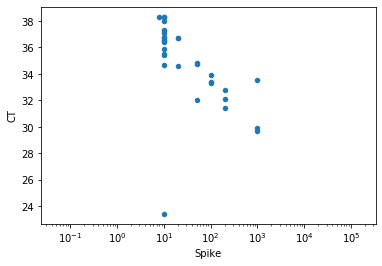

In [247]:
ncov.plot.scatter(x='Spike', y='CT', logx=True)

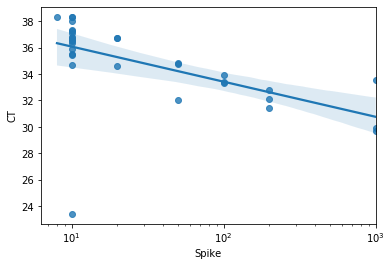

In [145]:
ax = sns.regplot(data=ncov, x='Spike', y='CT', logx=True)
ax.set_xscale('log')

## Yield

In [248]:
ncov['Quantity']

0       786.836670
1        51.649982
2         5.094864
3         4.339674
4         1.475899
5              NaN
6       675.741821
7        17.260052
8         7.492151
9         9.561484
10        1.167105
11             NaN
12       41.983311
13      131.214111
14       18.720165
15             NaN
16             NaN
17             NaN
18       74.544815
19       16.009193
20        2.562338
21        4.648498
22        1.203878
23             NaN
24      128.113022
25        4.015644
26        2.684406
27        1.216389
28             NaN
29             NaN
30      215.375900
31       19.097172
32        2.963149
33             NaN
34             NaN
35             NaN
36       47.500126
37        3.873697
38       10.573353
39        3.770322
40             NaN
41             NaN
42       31.587828
43    88320.468750
44             NaN
45        3.952175
46             NaN
47             NaN
Name: Quantity, dtype: float64

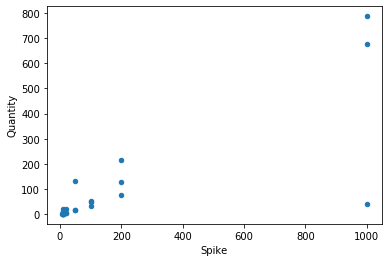

In [249]:
ncov[ncov['Sample Number'] != 16].plot.scatter(x='Spike', y='Quantity')

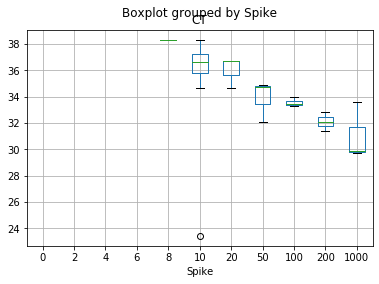

In [250]:
ncov.boxplot(by='Spike', column='CT')

In [251]:
ncov['RNA Input'] = ncov['Spike'] * 400 / 30 * 5

In [252]:
ncov.loc[:,'Yield'] = ncov['Quantity'] / ncov['RNA Input']

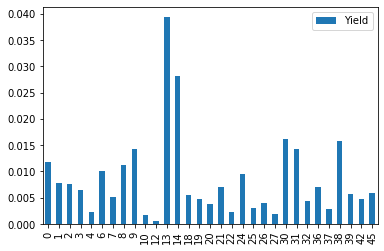

In [256]:
ncov[ncov['Yield'] < 1][['Sample Name','Yield']].plot.bar()

In [257]:
ncov[ncov['Yield'] < 1]['Yield'].describe()

count    31.000000
mean      0.008571
std       0.008084
min       0.000630
25%       0.003935
50%       0.005928
75%       0.010687
max       0.039364
Name: Yield, dtype: float64

In [141]:
(ncov['Quantity'] * 6) / (ncov['Spike'] * 400)

0       0.011803
1       0.007747
2       0.007642
3       0.006510
4       0.002214
5            NaN
6       0.010136
7       0.005178
8       0.011238
9       0.014342
10      0.001751
11           NaN
12      0.000630
13      0.039364
14      0.028080
15           NaN
16           NaN
17           NaN
18      0.005591
19      0.004803
20      0.003844
21      0.006973
22      0.002257
23           NaN
24      0.009608
25      0.003012
26      0.004027
27      0.001825
28           NaN
29           NaN
30      0.016153
31      0.014323
32      0.004445
33           NaN
34           NaN
35           NaN
36      0.007125
37      0.002905
38      0.015860
39      0.005655
40           NaN
41           NaN
42      0.004738
43    132.480703
44           NaN
45      0.005928
46           NaN
47           NaN
dtype: float64

## Diag

In [151]:
pos = qpcr_results[qpcr_results['Sample Name']=='PCD 1']
(pos['CT'] > 16).all()
(pos['CT'] < 23).all()

False

In [152]:
pos

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,Ct Threshold,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,CQCONF,EXPFAIL,HIGHSD,OUTLIERRG
15,10,A10,False,PCD 1,FAM,STANDARD,FAM,NFQ-MGB,18.190771,22.210115,...,19635.94988,True,3,12,Amp,NaN,N,N,Y,N
16,11,A11,False,PCD 1,FAM,STANDARD,FAM,NFQ-MGB,18.221386,22.210115,...,19635.94988,True,3,12,Inconclusive,NaN,N,N,Y,N
17,12,A12,False,PCD 1,FAM,STANDARD,FAM,NFQ-MGB,30.218191,22.210115,...,19635.94988,True,3,23,No Amp,NaN,Y,N,Y,Y


In [154]:
neg = qpcr_results[(qpcr_results['Sample Name']=='Negative') & (qpcr_results['Target Name'] == 'FAM')]
neg

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,Ct Threshold,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,CQCONF,EXPFAIL,HIGHSD,OUTLIERRG
117,79,G7,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,39.116722,...,19635.94988,True,3,18,No Amp,NaN,N,N,N,N
119,80,G8,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,39.116722,...,19635.94988,True,3,3,Inconclusive,NaN,N,N,N,N
121,81,G9,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,39.116722,...,19635.94988,True,3,3,Inconclusive,NaN,N,N,N,N
138,91,H7,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,39.116722,...,19635.94988,True,3,5,No Amp,NaN,N,N,N,N
140,92,H8,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,39.116722,...,19635.94988,True,3,12,No Amp,NaN,N,N,N,N
142,93,H9,False,Negative,FAM,NTC,FAM,NFQ-MGB,39.116722,39.116722,...,19635.94988,True,3,29,Amp,NaN,N,N,N,N


In [155]:
ierc = qpcr_results[(qpcr_results['Reporter'] == 'VIC') & qpcr_results['Sample Name'].str.contains('nCoV')]

In [161]:
ierc['CT'].describe()

count    47.000000
mean     29.528721
std       2.187122
min      25.360426
25%      28.330387
50%      29.370909
75%      30.621604
max      34.620770
Name: CT, dtype: float64

In [165]:
ierc.sort_values(by='Sample Name')[['Sample Name','CT','Amp Status']]

,Sample Name,CT,Amp Status
1,1 nCoV,25.360426,Amp
21,10 nCoV,28.542322,Amp
39,11 nCoV,25.463104,Amp
57,12 nCoV,28.797892,Amp
75,13 nCoV,28.692413,Amp
93,14 nCoV,27.194056,Amp
108,15 nCoV,28.314098,Amp
129,16 nCoV,29.451605,Amp
5,17 nCoV,27.531984,Amp
23,18 nCoV,27.700287,Amp


In [173]:
ncov.sort_values(by='Sample Number')[['Sample Name','CT','Spike','Amp Status']]

,Sample Name,CT,Spike,Amp Status
0,1 nCoV,29.687054,1000,Amp
6,2 nCoV,29.889180,1000,Amp
12,3 nCoV,33.578920,1000,Amp
18,4 nCoV,32.816510,200,Amp
24,5 nCoV,32.097412,200,Amp
30,6 nCoV,31.407583,200,Amp
36,7 nCoV,33.414970,100,Amp
42,8 nCoV,33.956720,100,Amp
1,9 nCoV,33.303745,100,Amp
7,10 nCoV,34.759296,50,Amp


In [215]:
neg['CT'].mean()

39.116722

In [266]:
diags = list()
for i in range(1,49):
    name = "{} nCoV".format(i) 
    
    sample_data = qpcr_results[qpcr_results['Sample Name'] == '{} nCoV'.format(i)].set_index('Target Name')
    ierc = sample_data.loc['VIC']
    ncov = sample_data.loc['FAM']
    
    result = {
        'Sample Name': name, 
        'Result': 'Unknown', 
        'Type': 'Unknown', 
        'CT': ncov['CT'], 
        'Quantity': ncov['Quantity'],
        'IECRNA CT': ierc['CT']}
    
    if ncov['Amp Status'] == 'Amp':
        result['Result'] = 'Positive'
        if ncov['CT'] <= 30 or ierc['Amp Status'] == 'Amp':
            result['Type'] = 'Quantitative'
        elif ncov['CT'] > 30 and ierc['Amp Status'] == 'No Amp':
            result['Type'] = 'Qualitative'
    else:
        if ierc['Amp Status'] == 'Amp':
            result['Result'] = 'Negative'
            result['Type'] = 'Qualitative'
        else:
            result['Type'] = 'Sample Failure'
            
    diags.append(result)
            
diags = pd.DataFrame(diags)
diags

,Sample Name,Result,Type,CT,Quantity,IECRNA CT
0,1 nCoV,Positive,Quantitative,29.687054,786.836670,25.360426
1,2 nCoV,Positive,Quantitative,29.889180,675.741821,28.412330
2,3 nCoV,Positive,Quantitative,33.578920,41.983311,31.666440
3,4 nCoV,Positive,Quantitative,32.816510,74.544815,29.382320
4,5 nCoV,Positive,Quantitative,32.097412,128.113022,29.098305
5,6 nCoV,Positive,Quantitative,31.407583,215.375900,25.952955
6,7 nCoV,Positive,Quantitative,33.414970,47.500126,28.856703
7,8 nCoV,Positive,Quantitative,33.956720,31.587828,29.370909
8,9 nCoV,Positive,Quantitative,33.303745,51.649982,26.678446
9,10 nCoV,Positive,Quantitative,34.759296,17.260052,28.542322


In [267]:
plate = diags.merge(qpcr_results.loc[qpcr_results['Target Name'] == 'FAM',['Sample Name', 'Well Position']])
plate['Column'] = plate['Well Position'].str[1:]
plate['Row'] = plate['Well Position'].str[:1]
plate = plate.pivot(index='Row', columns='Column', values='Result')
plate.to_clipboard()
plate

Column,1,2,3,4,5,6
Row,,,,,,
A,Positive,Positive,Positive,Positive,Positive,Negative
B,Positive,Positive,Positive,Positive,Positive,Negative
C,Positive,Positive,Positive,Negative,Negative,Negative
D,Positive,Positive,Positive,Positive,Positive,Negative
E,Positive,Positive,Positive,Positive,Negative,Negative
F,Positive,Positive,Positive,Negative,Negative,Negative
G,Positive,Positive,Positive,Positive,Negative,Negative
H,Positive,Negative,Negative,Positive,Negative,Negative


# Curves

In [175]:
qpcr_amp_data = pd.read_excel("./20200328 LOD.xlsx", sheet_name="Amplification Data", skiprows=42, na_values=['Undetermined'])

In [178]:
qpcr_amp_data = qpcr_amp_data.merge(qpcr_results[['Well', 'Sample Name']])

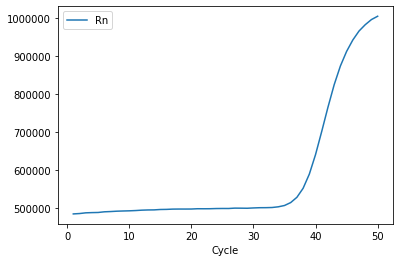

In [193]:
qpcr_amp_data[(qpcr_amp_data['Sample Name'] == '15 nCoV') & (qpcr_amp_data['Target Name'] == 'FAM')].plot(x='Cycle', y='Rn')